# The Inverse of a Matrix

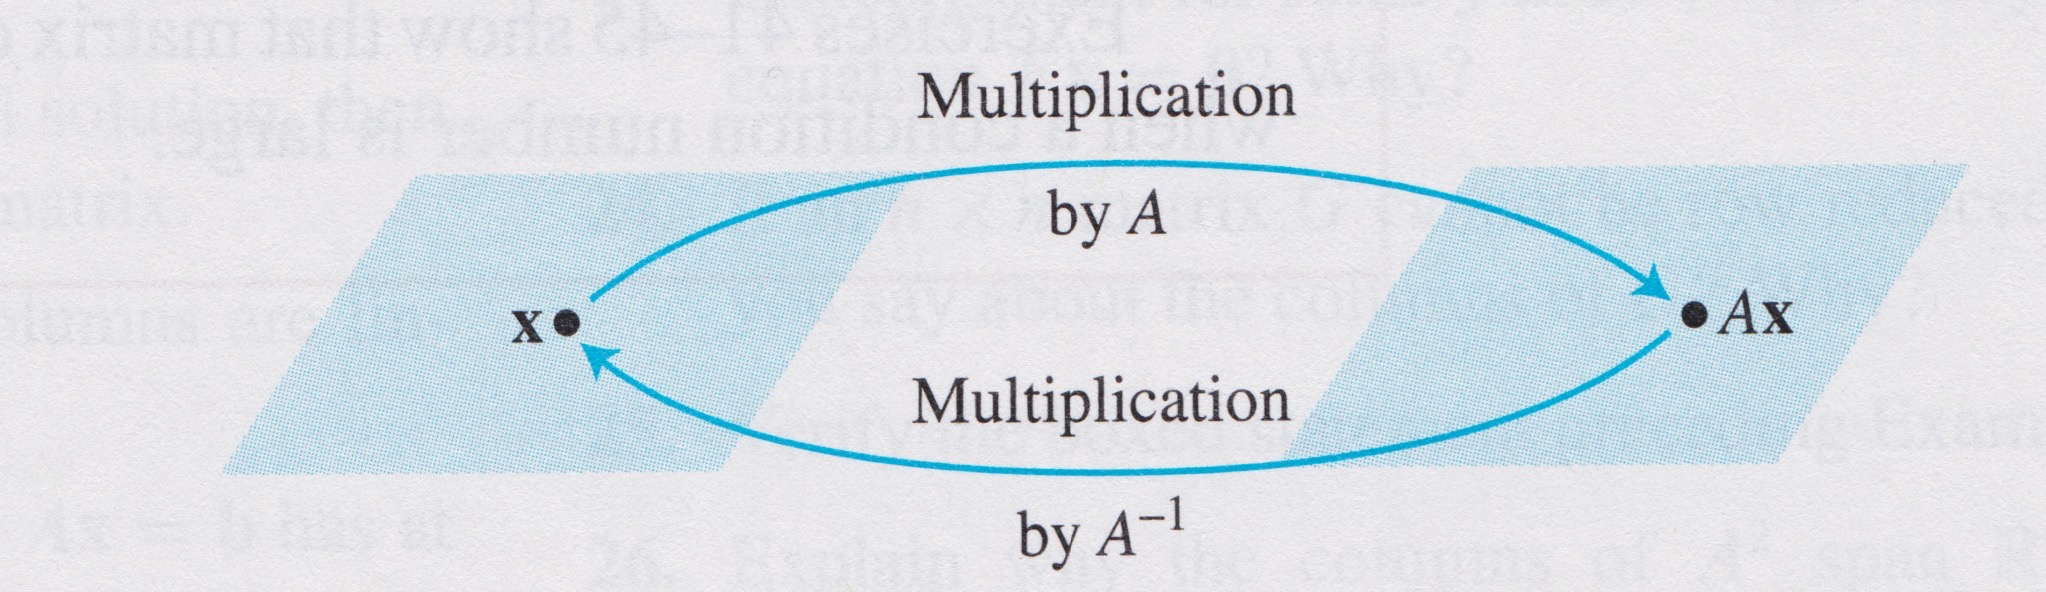

In [8]:
# image credit: Scan from Lay, 4th edition
display(Image("images/Lay-fig-2-3-2.jpeg", width=600))

In [1]:
# for QR codes use inline
%matplotlib inline
qr_setting = 'url'
#
# for lecture use notebook
# %matplotlib notebook
# qr_setting = None
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
reload(sl)
reload(ut);

Today we investigate the idea of the <font color=blue>"reciprocal"</font> of a matrix.

For reasons that will become clear, we will think about this way:
    
The reciprocal of any nonzero number $r$ is its multiplicative inverse $1/r = r^{-1}$ such that $r \cdot r^{-1} = 1.$

This gives a way to define what is called the _inverse_ of a matrix.

First, we have to recognize that this inverse does not exist for all matrices.

* It only exists for square matrices
* And not even for all square matrices -- only those that are "invertible."

__Definition.__ A matrix $A$ is called __invertible__ if there exists a matrix $C$ such that

$$ AC = I \mbox{  and  } CA = I. $$

In that case $C$ is called the _inverse_ of $A$.   Clearly, $C$ must also be square and the same size as $A$.

The inverse of $A$ is denoted $A^{-1}.$

A matrix that is not invertible is called a __singular__ matrix.

__Example.__

If $A = \left[\begin{array}{rr}2&5\\-3&-7\end{array}\right]$ and $C = \left[\begin{array}{rr}-7&-5\\3&2\end{array}\right]$, then:

$$ AC = \left[\begin{array}{rr}2&5\\-3&-7\end{array}\right]\left[\begin{array}{rr}-7&-5\\3&2\end{array}\right] = \left[\begin{array}{rr}1&0\\0&1\end{array}\right],$$

and:

$$ CA = \left[\begin{array}{rr}-7&-5\\3&2\end{array}\right]\left[\begin{array}{rr}2&5\\-3&-7\end{array}\right] = \left[\begin{array}{rr}1&0\\0&1\end{array}\right],$$

so we conclude that $C = A^{-1}.$

Let's think about what a matrix inverse does in a linear equation.

We have:

$$ A{\bf x} = {\bf b}. $$

So:

$$A^{-1}(A{\bf x}) = A^{-1}{\bf b}$$

$$(A^{-1}A){\bf x} = A^{-1}{\bf b}$$

$$I{\bf x} = A^{-1}{\bf b}$$

$${\bf x} = A^{-1}{\bf b}$$

__Theorem.__  If $A$ is an invertible $n\times n$ matrix, the for each ${\bf b}$ in $\mathbb{R}^n,$ the equation $A{\bf x} = {\bf b}$ has the unique solution $A^{-1}{\bf b}.$

__Proof.__ Follows directly from the definition of $A^{-1}.$

This very simple, powerful theorem gives us a new way to solve a linear system.

Furthermore, this theorem connects the matrix inverse to certain kinds of linear systems.  

We know that not all linear systems of $n$ equations in $n$ variables have a unique solution.  Such systems may have no solutions (inconsistent) or an infinite number of solutions.  

But this theorem says that __if $A$ is invertible, then the system has a unique solution.__

## Computing the Matrix Inverse

Wonderful - so to solve a linear system, we simply need to compute the inverse of $A$ (if it exists).  

How do we do that?

__Theorem.__  Let $A$ = $\left[\begin{array}{rr}a&b\\c&d\end{array}\right].$  If $ad-bc \neq 0$, then $A$ is invertible and 
$$A^{-1} = \frac{1}{ad-bc}\left[\begin{array}{rr}d&-b\\-c&a\end{array}\right].$$

If $ad-bc = 0$, then $A$ is not invertible.

Notice that this theorem tells us, for $2\times 2$ matrices, exactly _which ones_ are invertible: namely, those which have $ad-bc \neq 0$.   This quantity is called the __determinant__ of $A$.

__Example.__  Given a $2\times 2$ matrix $A$, if the columns of $A$ are linearly dependent, is $A$ invertible?

__Solution.__ If the columns of $A$ are linearly dependent, then at least one of the columns is a multiple of the other.  Let the multiplier be $m.$

Then we can express $A$ as:
$\left[\begin{array}{rr}a&ma\\b&mb\end{array}\right].$

The determinant of $A$ is $a(mb) - b(ma) = 0.$  

So no $2\times 2$ matrix with linearly dependent columns is invertible.  

## Question 10.1

__Computing the inverse for matrices larger than $2\times 2.$__

Let's look at a general method for computing the inverse of $A$.

Recall our definition of matrix multiplication: $AB$ is the matrix formed by multiplying $A$ times each column of $B$.

Let's look at the equation
$$AA^{-1} = I.$$

Let's call the columns of $A^{-1}$ = $[{\bf x_1}, {\bf x_2}, \dots, {\bf x_n}].$  We know what the columns of $I$ are: $[{\bf e_1}, {\bf e_2}, \dots, {\bf e_n}].$

So: 

$$ AA^{-1} = A[{\bf x_1}, {\bf x_2}, \dots, {\bf x_n}] = [{\bf e_1}, {\bf e_2}, \dots, {\bf e_n}].$$

So here is a general way to compute the inverse of $A$:

* Solve the linear system $A{\bf x_1} = {\bf e_1}$ to get the first column of $A^{-1}.$
* Solve the linear system $A{\bf x_2} = {\bf e_2}$ to get the second column of $A^{-1}.$
* $\dots$
* Solve the linear system $A{\bf x_n} = {\bf e_n}$ to get the last column of $A^{-1}.$

If any of the systems are inconsistent or have an infinite solution set, then $A^{-1}$ does not exist.

__The Computational View.__

This general strategy leads to an algorithm, described in the book, for inverting any matrix.  However, in this course I will not ask you invert matrices larger than $2\times 2$ by hand.  Any time you need to invert a matrix larger than $2\times 2,$ you may use a calculator or computer.

To invert a matrix in `Python/numpy,` use the function `np.linalg.inv().`  For example:

In [2]:
import numpy as np
A = np.array(
    [[ 2.0, 5.0],
     [-3.0,-7.0]])
print('A =\n',A)
B = np.linalg.inv(A)
print('B = \n',B)

A =
 [[ 2.  5.]
 [-3. -7.]]
B = 
 [[-7. -5.]
 [ 3.  2.]]


What do you think happens if you call `np.linalg.inv()` on a matrix that is not invertible?

In [3]:
A = np.array([[2.,4.],[2.,4.]])
np.linalg.inv(A)

LinAlgError: Singular matrix

The right way to handle this is:

In [4]:
A = np.array([[2.,4.],[2.,4.]])
try:
    np.linalg.inv(A)
except np.linalg.LinAlgError:
    print('Oops, looks like A is singular!')

Oops, looks like A is singular!


__Using the matrix inverse to solve a linear system.__

Solve the system:

$$\begin{array}{rcl}
3x_1 +4x_2 &=& 3\\
5x_1 +6x_2 &=& 7
\end{array}$$

Rewrite this system as $A{\bf x} = {\bf b}:$

$$ \left[\begin{array}{rr}3&4\\5&6\end{array}\right] {\bf x} = \left[\begin{array}{r}3\\7\end{array}\right].$$

The determinant of $A$ is $3(6)-4(5) = -2,$ which is nonzero, so $A$ has an inverse. The inverse of $A$ is:

$$ A^{-1} = \frac{1}{-2}\left[\begin{array}{rr}6&-4\\-5&3\end{array}\right] = \left[\begin{array}{rr}-3&2\\5/2&-3/2\end{array}\right].$$

So the solution is:

$$ {\bf x} = A^{-1}{\bf b} = \left[\begin{array}{rr}-3&2\\5/2&-3/2\end{array}\right]\left[\begin{array}{r}3\\7\end{array}\right] = \left[\begin{array}{r}5\\-3\end{array}\right].$$

__Theorem.__

* If $A$ is an invertible matrix, then $A^{-1}$ is invertible, and
$$(A^{-1})^{-1} = A.$$

* If $A$ is an invertible matrix, then so is $A^T,$ and the inverse of $A^T$ is the transpose of $A^{-1}.$
$$(A^T)^{-1} = (A^{-1})^T.$$

* If $A$ and $B$ are $n\times n$ invertible matrices, then so is $AB,$ and the inverse of $AB$ is the product of the inverses of $A$ and $B$ in the reverse order.  
$$(AB)^{-1} = B^{-1}A^{-1}.$$

The first two are straightforward.  Let's verify the last one because it shows some common calculation patterns:
$$(AB)(B^{-1}A^{-1})$$

$$=A(BB^{-1})A^{-1}$$

$$=AIA^{-1}$$

$$=AA^{-1}$$

$$=I.$$

## The Invertible Matrix Theorem

Earlier we saw that if a matrix $A$ is invertible, then $A{\bf x} = {\bf b}$ has a unique solution for any ${\bf b}$.

This suggests a deep connection between the invertibility of $A$ and the linear system $A{\bf x} = {\bf b}.$

In fact, we are now at the point where we can collect together in a fairly complete way much of what we have learned about matrices and linear systems.   This remarkable collection of ten interrelated properties is called the __Invertible Matrix Theorem (IMT).__

__Invertible Matrix Theorem.__  Let $A$ by a square $n\times n$ matrix.  Then the following statements are equivalent; that is, they are either __all true__ or __all false__:

* $A$ is an invertible matrix.

* $A^T$ is an invertible matrix.
    * Proof by direct construction: $(A^T)^{-1} = (A^{-1})^T.$

* The equation $A{\bf x} = {\bf b}$ has a unique solution for each ${\bf b}$ in $\mathbb{R}^n.$
    * As already mentioned, we proved this above.

* A is row equivalent to the identity matrix.
    * If $A{\bf x} = {\bf b}$ has a unique solution for any ${\bf b},$ then the reduced row echelon form of $A$ is $I$.

* A has $n$ pivot positions.
    * Follows directly from the previous statement.

* The equation $A{\bf x} = {\bf 0}$ has only the trivial solution.
    * If $A{\bf x} = {\bf b}$ has a unique solution for any ${\bf b},$ then the unique solution for ${\bf b} = {\bf 0}$ must be ${\bf 0.}$

* The columns of $A$ form a linearly independent set.
    * Follows directly the previous statement and the definition of linear independence.

* The columns of $A$ span $\mathbb{R}^n.$
    * For any ${\bf b} \in \mathbb{R}^n,$ there is a set of coefficients ${\bf x}$ which can be used to construct ${\bf b}$ from the columns of $A.$

* The linear transformation ${\bf x} \mapsto A{\bf x}$ maps $\mathbb{R}^n$ onto $\mathbb{R}^n.$
    * Follows directly from the previous statement.

* The linear transformation ${\bf x} \mapsto A{\bf x}$ is one-to-one.
    * Follows directly from the fact that $A{\bf x} = {\bf b}$ has a unique solution for any ${\bf b}.$

The arguments above show that if $A$ is invertible, then all the other statements are true.  In fact, the converse holds as well: if $A$ is not invertible, then all the other statements are false.  (We will skip the proof of the converse, but it's not difficult.)

This theorem has wide-ranging implications.  It divides the set of all $n\times n$ matrices into two disjoint classes: the invertible (nonsingular) matrices, and the noninvertible (singular) matrices.

The power of the IMT lies in the conections it provides among so many important concepts, such as linear idenpendence of the columns of a matrix $A$ and the existence of solutions to equations of the form $A{\bf x} = {\bf b}.$

This allows us to bring many tools to bear as needed to solve a problem.

__Example.__  Decide if $A$ is invertible:

$$A = \left[\begin{array}{rrr}1&0&-2\\3&1&-2\\-5&-1&9\end{array}\right].$$

__Solution.__

$$A \sim \left[\begin{array}{rrr}1&0&-2\\0&1&4\\0&-1&-1\end{array}\right] \sim \left[\begin{array}{rrr}1&0&-2\\0&1&4\\0&0&3\end{array}\right].$$

So $A$ has three pivot positions and hence is invertible, by the IMT.

## Question 10.2

__Note.__ While the IMT is quite powerful, it does not completely settle issues that arise with respect to $A{\bf x} = {\bf b}.$  This is because __it only applies to square matrices.__

So if $A$ is nonsquare, then we can't use the IMT to conclude anything about the existence or nonexistence of solutions to $A{\bf x} = {\bf b}.$

## Invertible Linear Transformations

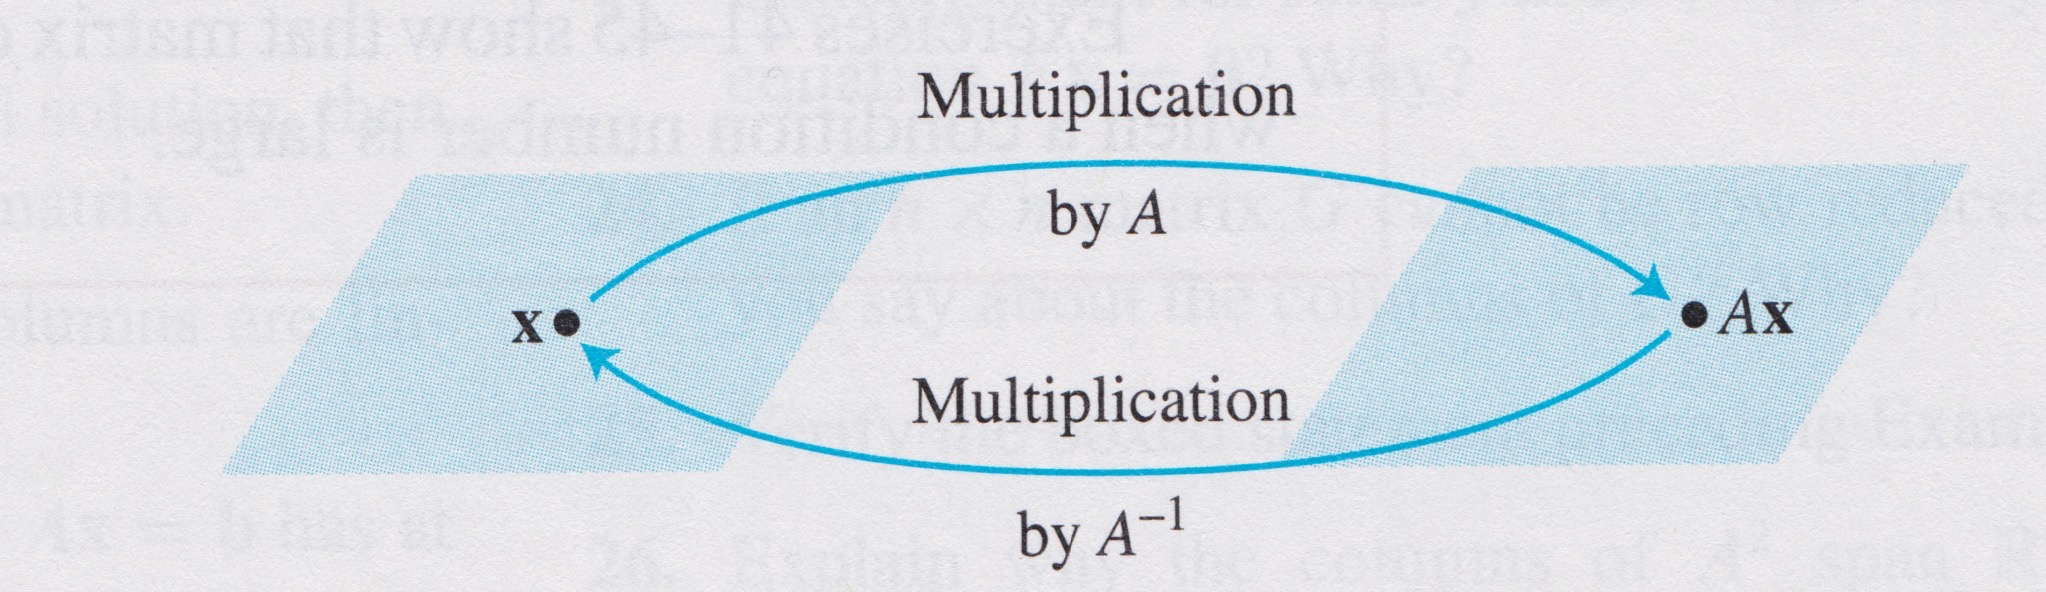

In [5]:
# image credit: Scan from Lay, 4th edition
display(Image("images/Lay-fig-2-3-2.jpeg", width=600))

A linear transformation $T: \mathbb{R}^n \rightarrow \mathbb{R}^n$ is __invertible__ if there exists a function $S: \mathbb{R}^n \rightarrow \mathbb{R}^n$ such that

$$ S(T({\bf x})) = {\bf x}\;\;\;\mbox{for all}\;{\bf x}\in\mathbb{R}^n,$$

and

$$ T(S({\bf x})) = {\bf x}\;\;\;\mbox{for all}\;{\bf x}\in\mathbb{R}^n.$$

__Theorem.__ Let $T: \mathbb{R}^n \rightarrow \mathbb{R}^n$ be a linear transformation and let $A$ be the standard matrix for $T$.  Then $T$ is invertible if and only if $A$ is an invertible matrix.  In that case the linear transformation $S$ given by $S({\bf x}) = A^{-1}{\bf x}$ is the unique function satisfying the definition.

Let's look at some invertible and non-invertible linear transformations.

[[0.5 0. ]
 [0.  1. ]]


<IPython.core.display.Latex object>

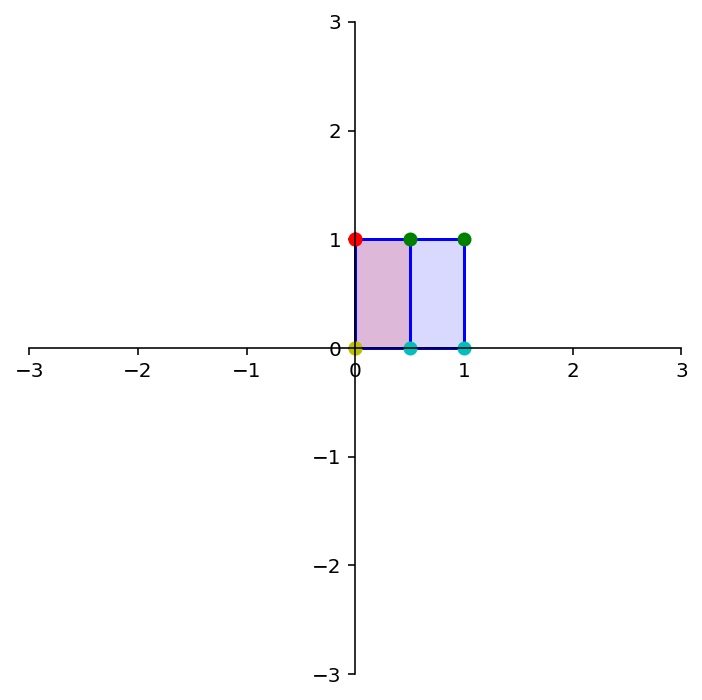

In [6]:
square = np.array([[0.0,1,1,0],[1,1,0,0]])
A = np.array(
    [[0.5, 0], 
     [  0, 1]])
print(A)
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
Latex(r'Horizontal Contraction')

Here $A = \left[\begin{array}{rr}0.5&0\\0&1\end{array}\right].$  Its determinant is $1(0.5)-0(0) = 0.5,$ so this linear transformation is invertible.

Its inverse is:
$$ \frac{1}{0.5}\left[\begin{array}{rr}1&0\\0&0.5\end{array}\right] = \left[\begin{array}{rr}2&0\\0&1\end{array}\right].$$

Clearly, just as $A$ contracted the $x_1$ direction by 0.5, $A^{-1}$ will expand the $x_1$ direction by 2.

<IPython.core.display.Latex object>

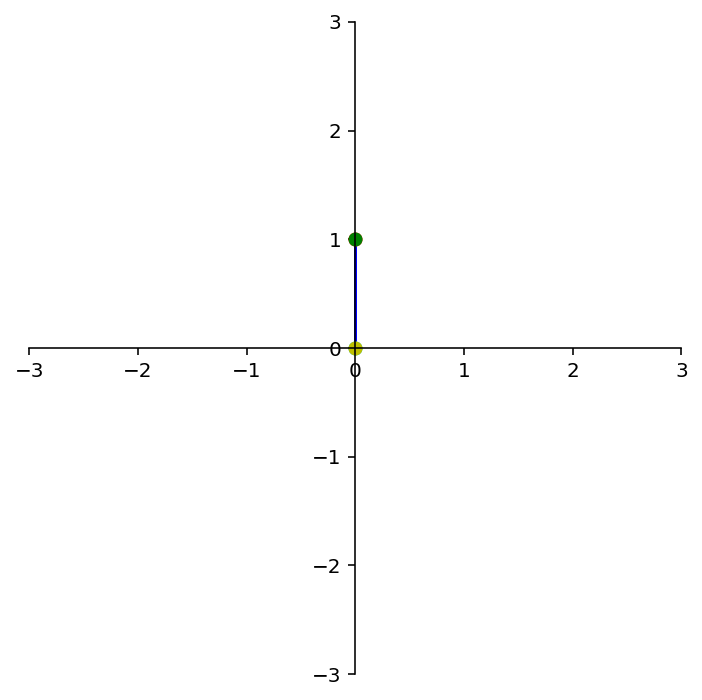

In [7]:
A = np.array(
    [[0,0],
     [0,1]])
dm.plotSetup()
dm.plotSquare(A.dot(square))
Latex(r'Projection onto the $x_2$ axis')

Here $A = \left[\begin{array}{rr}0&0\\0&1\end{array}\right].$  Its determinant is zero, so this linear transformation is __not__ invertible.

By the IMT, there are many equivalent ways to look at this:

* The mapping $T$ is not onto $\mathbb{R}^2.$ (Only a subset of $\mathbb{R}^2$ can be output by $T$).
* The mapping $T$ is not one-to-one.  (There are many values ${\bf x}$ that give the same $A{\bf x}.$)
* $A$ does not have 2 pivots.
* The columns of $A$ do not span $\mathbb{R}^2.$
* $A\mathbf{x} = 0$ has a non-trivial solution.

## Ill-Conditioned Matrices

The notion of a matrix inverse has some complications when used in practice.  

As we've noted, numerical computations are not exact, and in particular, we often find that `a - b(a/b)` does not evaluate to exactly zero on a computer.

For similar reasons, a matrix which is actually singular may not appear to be so when used in a computation.  

Conversely, a matrix which is not singular may appear to be singular when used in a computation.  This happens because, for example, the determinant does not evaluate to exactly zero, even though it should.

You recall that when we were implementing Gaussian elimination, we established a rule that if `a - b(a/b) < epsilon` for some `epsilon`, we would treat that quantity as if it were zero.   

We need an equivalent rule for matrices, so that we recognize when matrices are "nearly singular," and we don't try to solve $A{\bf x} = {\bf b}$ when that is the case.

This value is called the __condition number.__  The larger the condition number, the closer the matrix is to being singular.   

The condition number of the identity matrix is 1, which is the smallest possible value.  A singular matrix has an infinite condition number.

The point is that a matrix with a very large condition number, say, bigger than $10^8,$ will behave much like a singular matrix in practice.  

One should not try to solve linear systems by computer when the matrix $A$ has a very large condition number.

__Analogy.__

First, here is an analogy.

If a number is small, we might say that it is "almost zero."    

A very small number can behave almost like zero in some situations.   Consider a very small number like 0.0000000000001.   Now add it to 1.  The result is very close to 1 -- which is what you would have gotten if the number had been zero.   

Of course the result is not exactly 1 -- but <font color=blue>if you are working on a computer, with limited precision,</font> you might get exactly 1 by accident.

If a matrix has a large condition number, we might say that it is "almost singular."

A matrix that has a large condition number can behave almost like it is singular.   We know that if $A$ is a singular matrix, then $A{\bf x}={\bf b}$ does not have a unique solution.    If on the other hand $A$ is not singular, but has a very large condition number, then solving $A{\bf x}={\bf b}$ can be very inaccurate.   A small change in ${\bf b}$ (such as might be introduced by limited precision in your computer) will result in a huge change to the solution, ${\bf x}$.

__Demonstration.__

Here is a demonstration of why this is a problem.

Here is a matrix that is singular:

$$M = \left[\begin{array}{rr}1&2\\2&4\end{array}\right].$$

You can see that it is singular because the second column is a multiple of the first column.

Here is a matrix that is _almost_ singular:

$$A = \left[\begin{array}{ll}1&2.0000000001\\2&4\end{array}\right].$$

The second column is not a multiple of the first column, so technically this matrix is not singular.   But the second column is _almost_ a multiple of the first column.  

Now let's solve $A{\bf x} = {\bf b}$ using matrix $A.$

First, let's consider when ${\bf b} = \left[\begin{array}{r}1\\2\end{array}\right].$

Solving  $A{\bf x} = \left[\begin{array}{r}1\\2\end{array}\right]$ we get ${\bf x} = \left[\begin{array}{r}1\\0\end{array}\right].$

Now, let's change ${\bf b}$ just a little bit.  Let's set ${\bf b} = \left[\begin{array}{l}1\\2.01\end{array}\right].$  

Solving  $A{\bf x} = \left[\begin{array}{l}1\\2.01\end{array}\right]$ we get ${\bf x} = \left[\begin{array}{r}100000000\\-50000000\end{array}\right].$

Notice how a small change in ${\bf b}$ resulted in a huge change in ${\bf x}.$  This is because the matrix $A$ has a large condition number.   In fact the condition number of $A$ is about 12,500,000,000.

Now, this situation would not be a problem if you were always dealing with exact quantities in your computer.   

But you are not.   

Every floating point number has limited precision -- a limited number of digits that can be stored.   As a result, there can be a small error in the value of any number stored in the computer.    

This is not normally a problem -- you would not typically notice it.   

But if you are solving a system with a large condition number, the small error in ${\bf b}$ can get expanded in a large error in ${\bf x}$.  The error can be so large that the value you get for ${\bf x}$ is __completely wrong.__

To compute the condition number of a matrix `A` in `Python/numpy`, use `np.linalg.cond(A)`.